In [1]:
from entities import *
from constants import *
from simulations import *

import pickle
import numpy as np
import pandas as pd

c:\Users\amgal\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open(TEAMS_DATA, 'rb') as f:
    teams = pickle.load(f)

with open(STAT_EFFECTS, 'rb') as f:
    stats = pickle.load(f)

In [3]:
test = simulate_n_games(teams['Arizona'], teams['Duke'], 500, summary=True)

Simulating Game: Arizona vs. Duke


100%|██████████| 500/500 [00:03<00:00, 153.07it/s]


Preparing simulation analysis...
Arizona's depth produced higher 2P/3P totals and stronger rebounding, with fewer turnovers, outpacing Duke. Superior long-run efficiency and board control explain the lopsided simulation: Arizona over Duke.
Arizona vs. Duke Complete!


In [4]:
test['Record']

'Arizona: 346 - 154 :Duke'

In [5]:
test['Contributions']

,Team,2P,2PA,3P,3PA,BLK,STL,TOV,ORB,DRB,PF,Games Played
Anthony Dell'Orso,Arizona,157,472,98,488,62,94,125,15,236,141,220
Brayden Burries,Arizona,1056,1795,431,1082,98,369,270,147,1426,467,342
Ivan Kharchenkov,Arizona,822,1151,150,575,191,311,335,119,503,431,335
Jaden Bradley,Arizona,1138,2269,151,453,225,430,430,95,692,668,334
Motiejus Krivas,Arizona,670,1147,52,104,312,187,291,500,1355,479,291
Cayden Boozer,Duke,366,690,79,292,182,209,397,20,481,313,293
Dame Sarr,Duke,154,284,151,630,101,162,284,203,386,386,284
Isaiah Evans,Duke,621,1010,744,2094,197,344,270,98,739,221,344
Nikolas Khamenia,Duke,147,166,113,378,137,136,90,60,227,196,211
Patrick Ngongba,Duke,732,1091,27,161,202,161,222,484,626,505,282


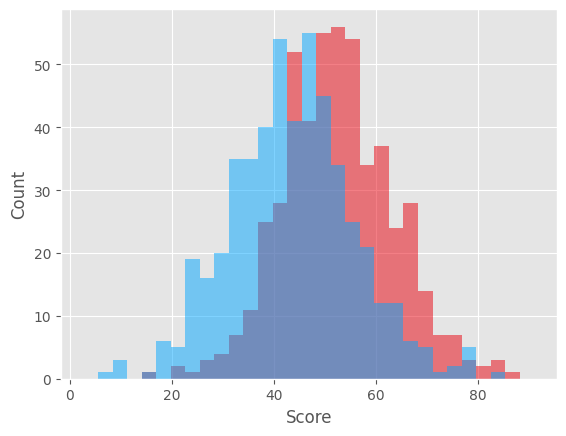

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot')

az = test['Scores']['Arizona']
duke = test['Scores']['Duke']

min_score = min(az + duke)
max_score = max(az + duke)
bins = np.linspace(min_score-5, max_score+5, 32)

plt.hist(az, bins=bins, color='#e8000d', alpha=0.5)
plt.hist(duke, bins=bins, color="#00A6FF", alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [7]:
get_number_of_possessions(teams['Arizona'], teams['Duke'])

In [8]:
test['Analysis']

"Arizona's depth produced higher 2P/3P totals and stronger rebounding, with fewer turnovers, outpacing Duke. Superior long-run efficiency and board control explain the lopsided simulation: Arizona over Duke."

In [9]:
print(
f"""
{test['Team 1'].name} has won {test['Win Count 1']} games ({round(test['Team 1 Win Pct'] * 100, 2)}%)
{test['Team 2'].name} has won {test['Win Count 2']} games ({round(test['Team 2 Win Pct'] * 100, 2)}%)

Overall winner: {test['Winner']}
""")


Arizona has won 346 games (69.0%)
Duke has won 154 games (31.0%)

Overall winner: Arizona

